# Exploración de los Datos Oficiales de Covid-19 en España

Se proporcionan la siguiente información a través del [Ministerio de Sanidad](https://cnecovid.isciii.es/covid19/#documentaci%C3%B3n-y-datos): 
* https://cnecovid.isciii.es/covid19/resources/casos_diagnostico_ccaa.csv, Número de casos por técnica diagnóstica y CCAA (de residencia)
* https://cnecovid.isciii.es/covid19/resources/casos_diagnostico_provincia.csv, Número de casos por técnica diagnóstica y provincia (de residencia)

En el siguiente documento se puede encontrar mayor información sobre la definición de las variables: [metadata_ccaa_prov_res.pdf](https://cnecovid.isciii.es/covid19/resources/metadata_ccaa_prov_res.pdf)

### Otras series de datos disponibles:
Se facilitan dos archivos CSV con la siguiente información:

* https://cnecovid.isciii.es/covid19/resources/casos_diag_ccaadecl.csv: Número de casos por técnica diagnóstica y CCAA (de declaración)
* https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv: Número de hospitalizaciones, número de ingresos en UCI y número de defunciones por sexo, edad y provincia de residencia.
En el siguiente documento se puede encontrar mayor información sobre la definición de las variables: [metadata_ccaadecl_prov_edad_sexo.pdf](https://cnecovid.isciii.es/covid19/resources/metadata_ccaadecl_prov_edad_sexo.pdf)

In [1]:
using DataFrames, DataFramesMeta, CSV, Plots, Dates, RollingFunctions

In [2]:
url = "https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv"

"https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv"

In [3]:
df = CSV.read(download(url), DataFrame);

In [4]:
CSV.write("DatosEvolucion_Provincia.csv", df)

"DatosEvolucion_Provincia.csv"

In [5]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,provincia_iso,,A,,ZA,0,String
2,sexo,,H,,NC,0,String
3,grupo_edad,,0-9,,NC,0,String
4,fecha,,2020-01-01,,2021-01-20,0,Date
5,num_casos,3.93098,0,0.0,710,0,Int64
6,num_hosp,0.378647,0,0.0,269,0,Int64
7,num_uci,0.0327321,0,0.0,35,0,Int64
8,num_def,0.0890344,0,0.0,100,0,Int64


In [6]:
gdf = combine(groupby(df, ["provincia_iso", "fecha"]), "num_casos" => sum, "num_hosp" => sum, "num_uci" => sum, "num_def" => sum);

In [7]:
esp = combine(groupby(df, ["fecha"]), "num_casos" => sum, "num_hosp" => sum, "num_uci" => sum, "num_def" => sum);

In [8]:
rename!(gdf, 3 => "num_casos", 4 => "num_hosp", 5 => "num_uci", 6 => "num_def");
rename!(esp, 2 => "num_casos", 3 => "num_hosp", 4 => "num_uci", 5 => "num_def");

In [9]:
df_bcn = gdf[gdf.provincia_iso .=== "B", :];
df_mad = gdf[gdf.provincia_iso .=== "M", :];

In [10]:
df_cat = gdf[((gdf.provincia_iso .=== "B") .| (gdf.provincia_iso .=== "T") .| (gdf.provincia_iso .=== "L") .| (gdf.provincia_iso .=== "GI")) , :];

In [11]:
df_cat= combine(groupby(df_cat, ["fecha"]), "num_casos" => sum, "num_hosp" => sum, "num_uci" => sum, "num_def" => sum);

In [12]:
rename!(df_cat, 2 => "num_casos", 3 => "num_hosp", 4 => "num_uci", 5 => "num_def");

In [13]:
dates = df_bcn.fecha;

In [14]:
n = 31

dates_month = [dates[i] for i in collect(length(dates)-n:length(dates))]
bcn_month = [df_bcn.num_casos[i] for i in collect(length(df_bcn.num_casos)-n:length(df_bcn.num_casos))];
mad_month = [df_mad.num_casos[i] for i in collect(length(df_mad.num_casos)-n:length(df_mad.num_casos))];
cat_month = [df_cat.num_casos[i] for i in collect(length(df_cat.num_casos)-n:length(df_cat.num_casos))];

In [15]:
df_bcn_7 = runmean(df_bcn.num_casos, 7);
df_mad_7 = runmean(df_mad.num_casos, 7);
df_cat_7 = runmean(df_cat.num_casos, 7);
df_esp_7 = runmean(esp.num_casos, 7)

df_bcn_14 = runmean(df_bcn.num_casos, 14);
df_mad_14 = runmean(df_mad.num_casos, 14);
df_cat_14 = runmean(df_cat.num_casos, 14);
df_esp_14 = runmean(esp.num_casos, 14);


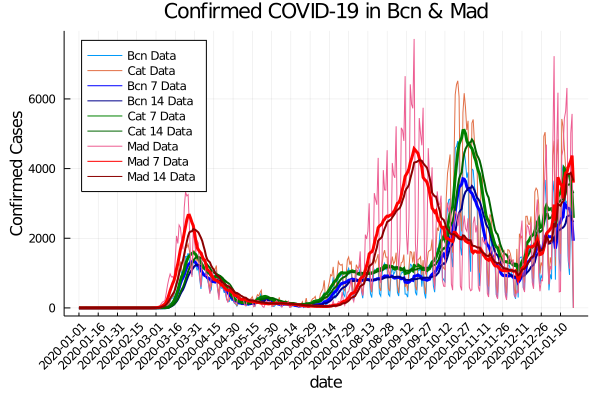

In [16]:
plot(dates, df_bcn.num_casos, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Bcn Data")
xlabel!("date")
ylabel!("Confirmed Cases")
title!("Confirmed COVID-19 in Bcn & Mad")
plot!(dates, df_cat.num_casos, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Cat Data")
plot!(dates, df_bcn_7, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Bcn 7 Data", lw = 3, c="blue")
plot!(dates, df_bcn_14, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Bcn 14 Data", lw = 2, c="darkblue")
plot!(dates, df_cat_7, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Cat 7 Data", lw = 3, c="green")
plot!(dates, df_cat_14, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Cat 14 Data", lw = 2, c="darkgreen")
plot!(dates, df_mad.num_casos, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Mad Data")
plot!(dates, df_mad_7, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Mad 7 Data", lw = 3, c="red")
plot!(dates, df_mad_14, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Mad 14 Data", lw = 2, c="darkred")

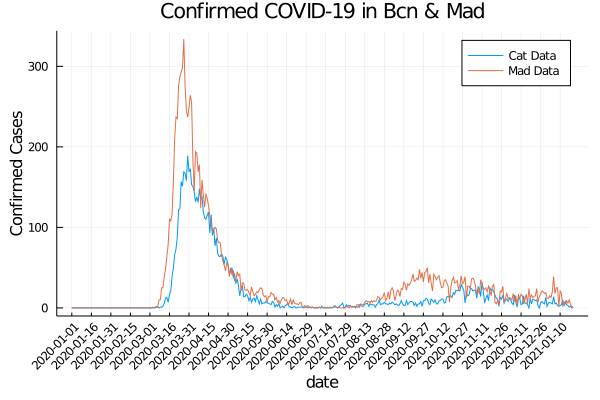

In [17]:
plot(dates, df_bcn.num_def, xticks=dates[1:15:end], xrotation=45, leg=:topright, label="Cat Data")
xlabel!("date")
ylabel!("Confirmed Cases")
title!("Confirmed COVID-19 in Bcn & Mad")
plot!(dates, df_mad.num_def, xticks=dates[1:15:end], xrotation=45, leg=:topright, label="Mad Data")

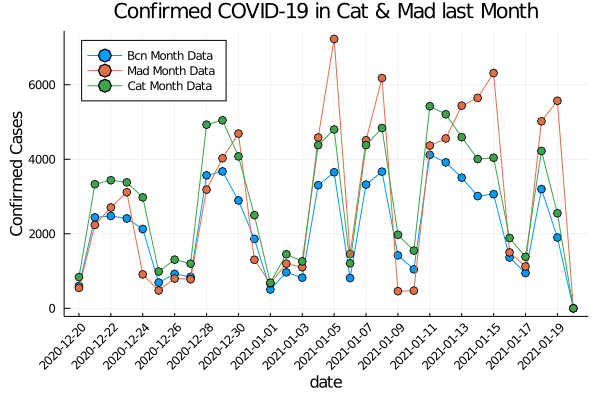

In [18]:
plot(dates_month, bcn_month, xticks=dates_month[1:2:end], xrotation=45, leg=:topleft, label="Bcn Month Data", m=:o)
xlabel!("date")
ylabel!("Confirmed Cases")
title!("Confirmed COVID-19 in Cat & Mad last Month")
plot!(dates_month, mad_month, xticks=dates_month[1:2:end], xrotation=45, leg=:topleft, label="Mad Month Data", m=:o)
plot!(dates_month, cat_month, xticks=dates_month[1:2:end], xrotation=45, leg=:topleft, label="Cat Month Data", m=:o)

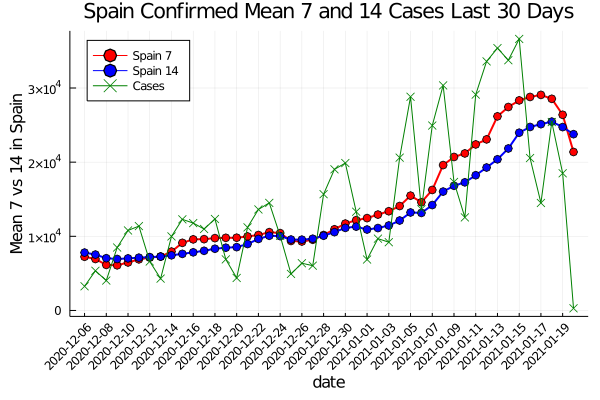

In [19]:
n = 45
plot(dates[end-n:end], df_esp_7[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="Spain 7", m=:o, lw=2, c="red")
xlabel!("date")
ylabel!("Mean 7 vs 14 in Spain")
title!("Spain Confirmed Mean 7 and 14 Cases Last 30 Days")

plot!(dates[end-n:end], df_esp_14[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="Spain 14", m=:o, lw = 2, c="blue")
plot!(dates[end-n:end], esp.num_casos[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="Cases", m=:x, c="green")


In [20]:
gdf[(gdf.fecha .== Date(today()-Day(2))) .& (gdf.provincia_iso .=== "B"), :]

,provincia_iso,fecha,num_casos,num_hosp,num_uci,num_def
,String,Date,Int64,Int64,Int64,Int64
1,B,2021-01-19,1900,10,0,0


In [21]:
gdf[(gdf.fecha .== Date(today()-Day(2))) .& (gdf.provincia_iso .=== "M"), :]

,provincia_iso,fecha,num_casos,num_hosp,num_uci,num_def
,String,Date,Int64,Int64,Int64,Int64
1,M,2021-01-19,5570,6,0,2


In [22]:
esp[esp.fecha .== Date(today()-Day(2)), :]

,fecha,num_casos,num_hosp,num_uci,num_def
,Date,Int64,Int64,Int64,Int64
1,2021-01-19,18500,510,37,80


In [23]:
df_cat[df_cat.fecha .== Date(today()-Day(2)), :]

,fecha,num_casos,num_hosp,num_uci,num_def
,Date,Int64,Int64,Int64,Int64
1,2021-01-19,2550,13,0,1


## Datos Globales España

In [24]:
Spain_7 = runmean(esp.num_casos, 7);
Spain_14 = runmean(esp.num_casos, 14);

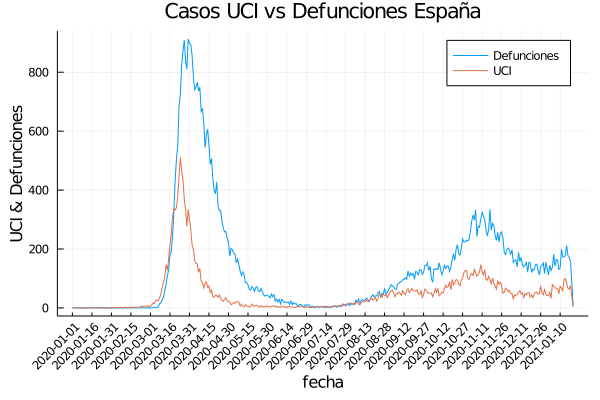

In [25]:
plot(esp.fecha, esp.num_def, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topright, label="Defunciones")
xlabel!("fecha")
ylabel!("UCI & Defunciones")
title!("Casos UCI vs Defunciones España")
plot!(esp.fecha, esp.num_uci, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topright, label="UCI")

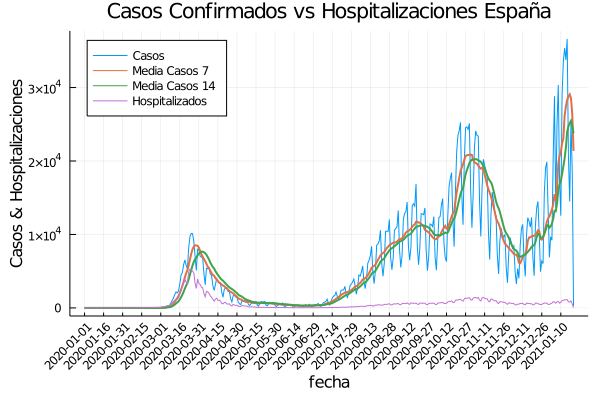

In [26]:
plot(esp.fecha, esp.num_casos, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topleft, label="Casos")
xlabel!("fecha")
ylabel!("Casos & Hospitalizaciones")
title!("Casos Confirmados vs Hospitalizaciones España")
plot!(esp.fecha, Spain_7, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topleft, label="Media Casos 7", lw=2)
plot!(esp.fecha, Spain_14, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topleft, label="Media Casos 14",lw=2)
plot!(esp.fecha, esp.num_hosp, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topleft, label="Hospitalizados")


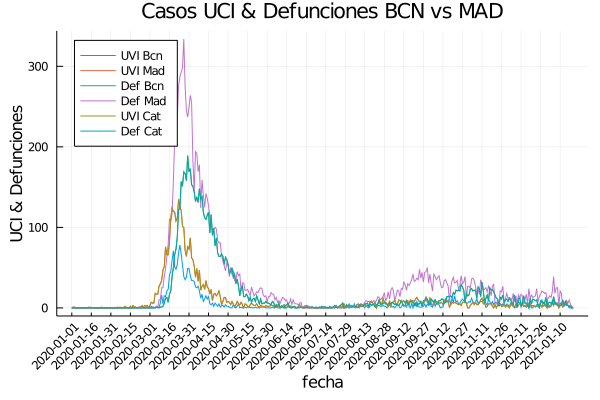

In [27]:
plot(df_bcn.fecha, df_bcn.num_uci, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topleft, label="UVI Bcn")
xlabel!("fecha")
ylabel!("UCI & Defunciones")
title!("Casos UCI & Defunciones BCN vs MAD")
plot!(df_mad.fecha, df_mad.num_uci, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topleft, label="UVI Mad")
plot!(df_bcn.fecha, df_bcn.num_def, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topleft, label="Def Bcn")
plot!(df_mad.fecha, df_mad.num_def, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topleft, label="Def Mad")
plot!(df_cat.fecha, df_mad.num_uci, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topleft, label="UVI Cat")
plot!(df_cat.fecha, df_bcn.num_def, xticks=esp.fecha[1:15:end], xrotation=45, leg=:topleft, label="Def Cat")

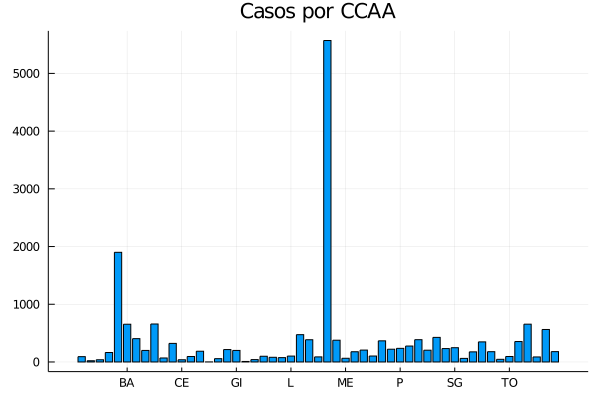

In [28]:
plot(gdf[(gdf.fecha .== Date(today()-Day(2))), :].provincia_iso, gdf[(gdf.fecha .== Date(today()-Day(2))), :].num_casos, seriestype = :bar, legend = false)
title!("Casos por CCAA")